# Implementacion del algoritmo de Deutsch-Jozsa en dos cubits para una funcion balanceada

In [17]:
import numpy as np

from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, execute
from qiskit.tools.jupyter import *
from qiskit import Aer, execute
from qiskit.visualization import plot_bloch_multivector, plot_histogram, plot_state_qsphere

Empezamos por crear un circuito de dos cubits y preparamos cada uno de los cubits iniciales, el primero en el estado |0> y el segundo en el estado |1>.

In [2]:
qc = QuantumCircuit(2,1)

**Paso 1:** Preparamos los cubits de entrada, donde q0=0, q1=1

In [4]:
qc.i(0)
qc.x(1)
qc.barrier()
qc.draw()

┌───┐ ░ 
q_0: ┤ I ├─░─
     ├───┤ ░ 
q_1: ┤ X ├─░─
     └───┘ ░ 
c: 1/════════

Por lo tanto, podemos decir que el estado Psi_0 al punto donde dibujamos la barrera, es el estado |01>

**Paso 2:** Ahora ponemos nuestros cubits en superposicion, aplicandoles la compuerta de Hadamard

In [5]:
qc.h(0)
qc.h(1)
qc.barrier()
qc.draw()

┌───┐ ░ ┌───┐ ░ 
q_0: ┤ I ├─░─┤ H ├─░─
     ├───┤ ░ ├───┤ ░ 
q_1: ┤ X ├─░─┤ H ├─░─
     └───┘ ░ └───┘ ░ 
c: 1/════════════════

**Paso 3:** Añadir la compuerta de CNOT que genera la funcion de tipo balanceada

In [6]:
qc.cx(0,1)
qc.barrier()
qc.draw()

┌───┐ ░ ┌───┐ ░       ░ 
q_0: ┤ I ├─░─┤ H ├─░───■───░─
     ├───┤ ░ ├───┤ ░ ┌─┴─┐ ░ 
q_1: ┤ X ├─░─┤ H ├─░─┤ X ├─░─
     └───┘ ░ └───┘ ░ └───┘ ░ 
c: 1/════════════════════════

**Paso 4:** Añadimos compuertas de Hadamard a todos los cubits

In [7]:
qc.h(0)
qc.h(1)
qc.barrier()

**Paso 5:** Añadimos un operador de medicion al primer cubit.

In [8]:
qc.measure(0,0)

In [9]:
qc.draw()

┌───┐ ░ ┌───┐ ░       ░ ┌───┐ ░ ┌─┐
q_0: ┤ I ├─░─┤ H ├─░───■───░─┤ H ├─░─┤M├
     ├───┤ ░ ├───┤ ░ ┌─┴─┐ ░ ├───┤ ░ └╥┘
q_1: ┤ X ├─░─┤ H ├─░─┤ X ├─░─┤ H ├─░──╫─
     └───┘ ░ └───┘ ░ └───┘ ░ └───┘ ░  ║ 
c: 1/═════════════════════════════════╩═
                                      0

**Paso 6:** Ahora ejecutamos el circuito en el simulador para confirmar nuestro resultado

In [14]:
backend = Aer.get_backend('qasm_simulator')
result = execute(qc, backend = backend, shots=1024).result()
counts = result.get_counts(qc)

In [15]:
print(counts)

{'1': 1024}


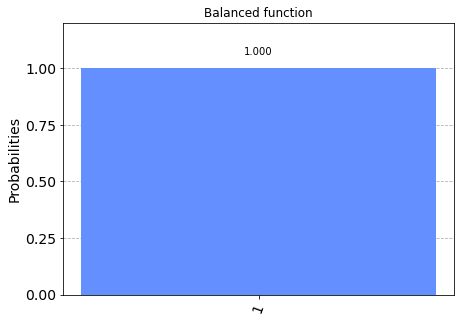

In [18]:
plot_histogram(counts, title='Balanced function')